In [8]:
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, learning_curve, validation_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_data = pd.read_csv('/content/drive/My Drive/Re_SA/MLs/train_df_balanced.csv');
train_data

,text,label
0,"Game felt too restrictive for my taste, also c...",0
1,This is hands down the worst tutorial I have e...,0
2,I know this might sound dumb to 99% of the pla...,0
3,"I turned off the online function and STILL, OT...",0
4,"as does the Quest 2 headset itself, as well a...",0
...,...,...
1195,love taking photo another planet,2
1196,I used to keep a notepad on my phone that I up...,2
1197,goofy diseases and even more goofy ways to cur...,2
1198,the game features a range of fun and challengi...,2


In [5]:
test_data = pd.read_csv('/content/drive/My Drive/Re_SA/MLs/test_df_imbalanced.csv');
test_data

,text,label
0,which is pretty intuitive and easy to learn.,2
1,"weapon handling, hit reaction and the ""punchy ...",2
2,Crash on startup every time,0
3,scratches and itch but falls short of providin...,0
4,There's sort of the illusion of split paths a...,0
...,...,...
1967,"It's quite fast paced,",1
1968,I have some mixed feelings after the free week...,1
1969,a sad E-sport failure.,0
1970,Hold to confirm There actually is an option ...,0


# Naive Bayes

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters found:  {'classifier__alpha': 0.5, 'vectorizer__max_features': 1000, 'vectorizer__ngram_range': (1, 2)}
Cross-validation scores:  [0.54166667 0.5        0.475      0.5375     0.55416667]
Mean cross-validation score:  0.5216666666666667
              precision    recall  f1-score   support

           0      0.675     0.660     0.668       701
           1      0.380     0.759     0.507       274
           2      0.798     0.592     0.680       997

    accuracy                          0.639      1972
   macro avg      0.618     0.670     0.618      1972
weighted avg      0.696     0.639     0.651      1972

Predictions saved to /content/drive/My Drive/Re_SA/MLs/NB_TF_predictions.csv


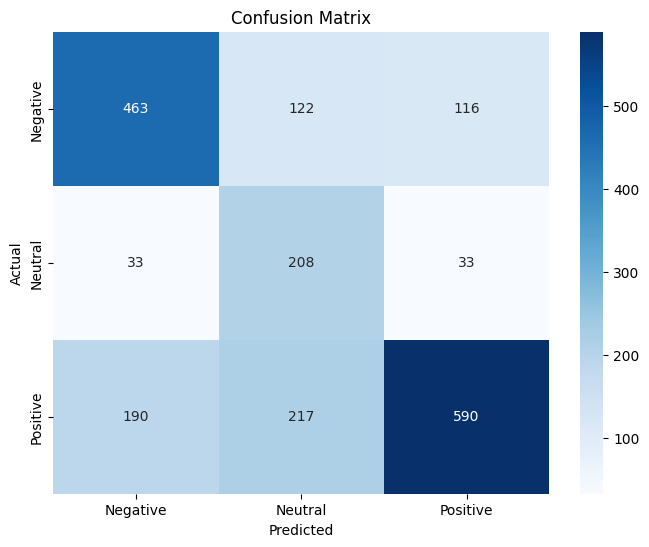

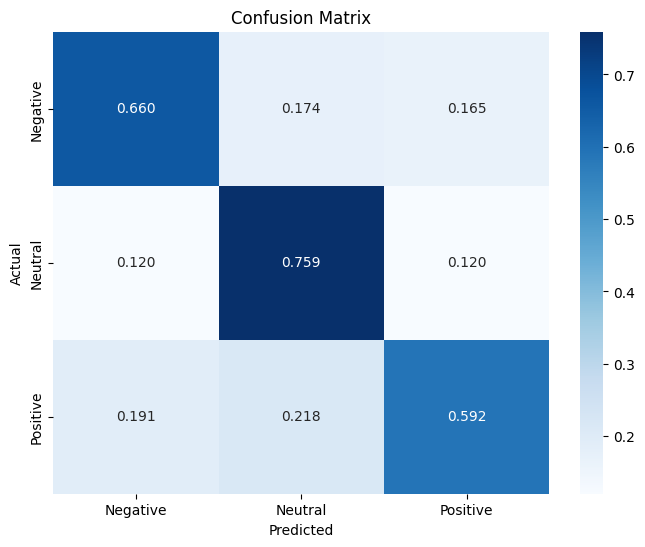

In [ ]:
def load_data(train_filepath, test_filepath):
    train_data = pd.read_csv(train_filepath)
    test_data = pd.read_csv(test_filepath)
    return train_data['text'], train_data['label'], test_data['text'], test_data['label']

def preprocess_text(text, min_length):
    return ' '.join([word for word in text.split() if len(word) >= min_length])

def main():
    train_filepath = '/content/drive/My Drive/Re_SA/MLs/train_df_balanced.csv'
    test_filepath = '/content/drive/My Drive/Re_SA/MLs/test_df_imbalanced.csv'
    X_train, y_train, X_test, y_test = load_data(train_filepath, test_filepath)
    X_train = X_train.apply(preprocess_text, min_length=0)
    X_test = X_test.apply(preprocess_text, min_length=0)

    pipeline = Pipeline([
        ('vectorizer', TfidfVectorizer()),
        ('classifier', MultinomialNB())
    ])

    param_grid = {
        'vectorizer__ngram_range': [(1, 1), (1, 2), (2, 2)],
        'vectorizer__max_features': [1000, 5000, 10000],
        'classifier__alpha': [0.1, 0.5, 1.0, 1.5, 2.0]
    }

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)

    grid_search.fit(X_train, y_train)

    print("Best parameters found: ", grid_search.best_params_)

    cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
    print("Cross-validation scores: ", cv_scores)
    print("Mean cross-validation score: ", cv_scores.mean())

    y_pred = grid_search.predict(X_test)
    print(classification_report(y_test, y_pred, digits=3))



    output_filepath = '/content/drive/My Drive/Re_SA/MLs/NB_TF_predictions.csv'
    pd.DataFrame({'Text':X_test,'Actual': y_test, 'Predicted': y_pred}).to_csv(output_filepath, index=False)
    print(f"Predictions saved to {output_filepath}")


    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    cm = confusion_matrix(y_test, y_pred, normalize="true")
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.3f', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


if __name__ == "__main__":
    main()


# Decision Tree

## Basic

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best parameters found:  {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'vectorizer__max_features': 10000, 'vectorizer__ngram_range': (2, 2)}
Cross-validation scores:  [0.40416667 0.44166667 0.42083333 0.42083333 0.49166667]
Mean cross-validation score:  0.43583333333333335
              precision    recall  f1-score   support

           0      0.608     0.474     0.532       701
           1      0.260     0.839     0.397       274
           2      0.741     0.402     0.521       997

    accuracy                          0.488      1972
   macro avg      0.536     0.572     0.484      1972
weighted avg      0.627     0.488     0.508      1972

Predictions saved to /content/drive/My Drive/Re_SA/MLs/DT_TF_predictions.csv


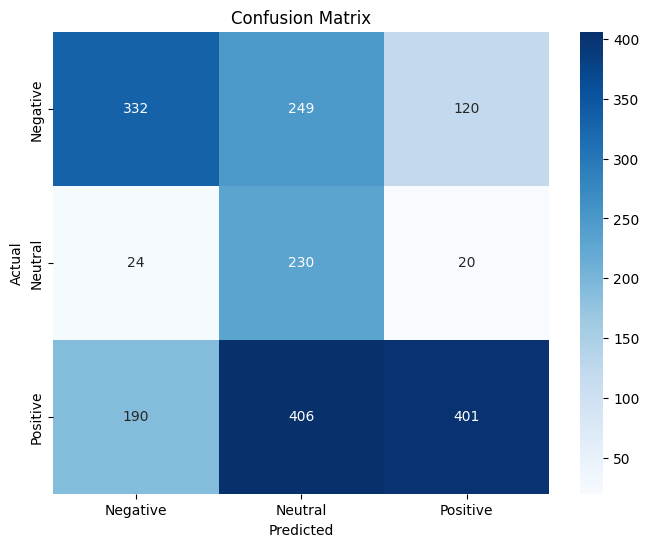

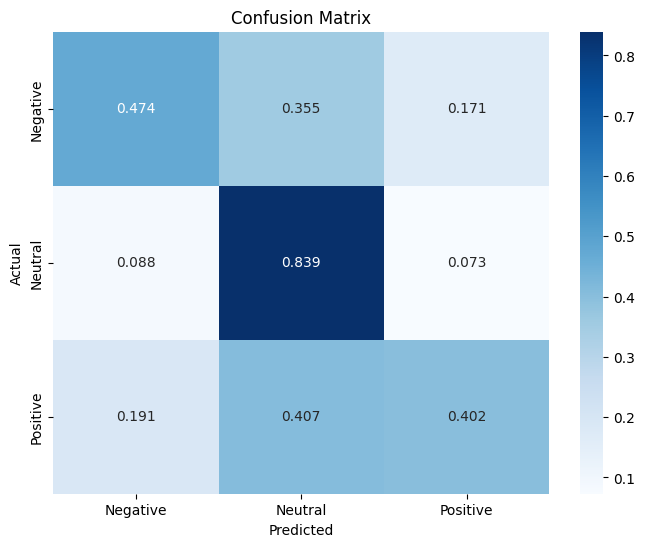

In [ ]:


def load_data(train_filepath, test_filepath):
    train_data = pd.read_csv(train_filepath)
    test_data = pd.read_csv(test_filepath)
    return train_data['text'], train_data['label'], test_data['text'], test_data['label']

def main():
    train_filepath = '/content/drive/My Drive/Re_SA/MLs/train_df_balanced.csv'
    test_filepath = '/content/drive/My Drive/Re_SA/MLs/test_df_imbalanced.csv'
    X_train, y_train, X_test, y_test = load_data(train_filepath, test_filepath)
    X_train = X_train.apply(preprocess_text, min_length=0)
    X_test = X_test.apply(preprocess_text, min_length=0)


    pipeline = Pipeline([
        ('vectorizer', TfidfVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ])

    param_grid = {
        'vectorizer__ngram_range': [(1, 1), (1, 2), (2, 2)],
        'vectorizer__max_features': [1000, 5000, 10000],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    }

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)

    grid_search.fit(X_train, y_train)

    print("Best parameters found: ", grid_search.best_params_)

    cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
    print("Cross-validation scores: ", cv_scores)
    print("Mean cross-validation score: ", cv_scores.mean())

    y_pred = grid_search.predict(X_test)
    print(classification_report(y_test, y_pred, digits=3))


    output_filepath = '/content/drive/My Drive/Re_SA/MLs/DT_TF_predictions.csv'
    pd.DataFrame({'Text':X_test,'Actual': y_test, 'Predicted': y_pred}).to_csv(output_filepath, index=False)
    print(f"Predictions saved to {output_filepath}")


    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    cm = confusion_matrix(y_test, y_pred, normalize="true")
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.3f', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


if __name__ == "__main__":
    main()

## Evaluate

In [10]:
def load_data(train_filepath, test_filepath):
    """Load train and test data"""
    train_df = pd.read_csv(train_filepath)
    test_df = pd.read_csv(test_filepath)
    X_train = train_df['text']
    y_train = train_df['label']
    X_test = test_df['text']
    y_test = test_df['label']
    return X_train, y_train, X_test, y_test

def preprocess_text(text, min_length=0):
    return text

def plot_learning_curve(estimator, X, y, title="Learning Curve", ylim=None, cv=5,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure(figsize=(10, 6))
    if ylim is not None:
        plt.ylim(*ylim)
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
        scoring='accuracy'
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")

    gap = train_scores_mean[-1] - test_scores_mean[-1]
    if gap > 0.1:
        plt.figtext(0.5, 0.01, f"Gap: {gap:.3f} - Model likely OVERFITTING",
                   ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5})
    elif test_scores_mean[-1] < 0.65:
        plt.figtext(0.5, 0.01, f"Low performance: {test_scores_mean[-1]:.3f} - Model likely UNDERFITTING",
                   ha="center", fontsize=12, bbox={"facecolor":"red", "alpha":0.5})
    else:
        plt.figtext(0.5, 0.01, "Model fit appears GOOD",
                   ha="center", fontsize=12, bbox={"facecolor":"green", "alpha":0.5})

    return plt

def plot_complexity_curve(X_train, y_train, X_test, y_test, param_name, param_range, pipeline):
    train_scores, test_scores = [], []

    for param_value in param_range:
        if param_name == 'max_depth':
            pipeline.set_params(classifier__max_depth=param_value)
        elif param_name == 'min_samples_leaf':
            pipeline.set_params(classifier__min_samples_leaf=param_value)

        pipeline.fit(X_train, y_train)

        train_scores.append(pipeline.score(X_train, y_train))
        test_scores.append(pipeline.score(X_test, y_test))

    plt.figure(figsize=(10, 6))
    plt.title(f"Model Complexity Curve: {param_name}")
    plt.xlabel(f"Value of {param_name}")
    plt.ylabel("Accuracy")
    plt.plot(param_range, train_scores, 'o-', color="r", label="Training score")
    plt.plot(param_range, test_scores, 'o-', color="g", label="Test score")
    plt.grid()
    plt.legend(loc="best")

    max_gap = max([t - v for t, v in zip(train_scores, test_scores)])
    if max_gap > 0.1:
        plt.figtext(0.5, 0.01, f"Maximum gap: {max_gap:.3f} - Potential overfitting at higher complexity",
                   ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5})

    plt.show()

    return train_scores, test_scores

def evaluate_model_fit(pipeline, X_train, y_train, X_test, y_test):

    train_score = pipeline.score(X_train, y_train)
    test_score = pipeline.score(X_test, y_test)

    gap = train_score - test_score

    print(f"\n--- Model Fit Analysis ---")
    print(f"Training accuracy: {train_score:.3f}")
    print(f"Test accuracy: {test_score:.3f}")
    print(f"Gap (train - test): {gap:.3f}")

    if gap > 0.1:
        if train_score > 0.9:
            print("Diagnosis: OVERFITTING - Model performs much better on training data than test data")
            print("Recommendation: Increase regularization, reduce model complexity, gather more training data")
        else:
            print("Diagnosis: SOME OVERFITTING - Gap exists but model isn't capturing all training data patterns")
            print("Recommendation: Balance regularization and model complexity")
    elif test_score < 0.7:
        print("Diagnosis: UNDERFITTING - Model performs poorly on both training and test data")
        print("Recommendation: Increase model complexity, add more features, reduce regularization")
    else:
        print("Diagnosis: GOOD FIT - Model generalizes well with acceptable performance")

    return train_score, test_score, gap

Fitting model with grid search...
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters found:  {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'vectorizer__max_features': 5000, 'vectorizer__ngram_range': (1, 2)}
Cross-validation scores:  [0.425      0.4        0.425      0.4375     0.42916667]
Mean cross-validation score:  0.42333333333333334
              precision    recall  f1-score   support

           0      0.615     0.569     0.591       701
           1      0.359     0.920     0.517       274
           2      0.770     0.480     0.592       997

    accuracy                          0.573      1972
   macro avg      0.581     0.656     0.567      1972
weighted avg      0.658     0.573     0.581      1972

Predictions saved to /content/drive/My Drive/Re_SA/MLs/DT_Bow_predictions_eva.csv


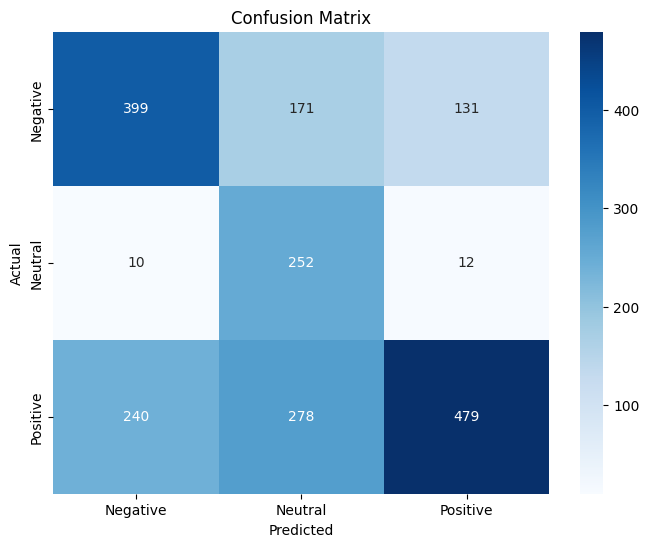

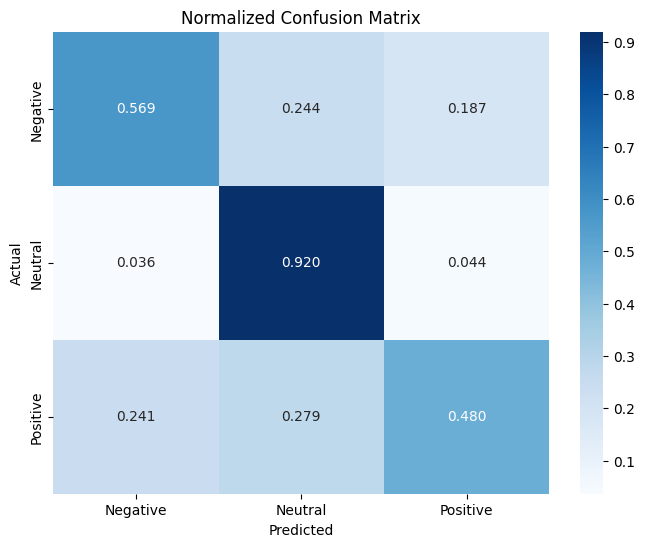


==== EVALUATING MODEL FIT ====

--- Model Fit Analysis ---
Training accuracy: 0.917
Test accuracy: 0.573
Gap (train - test): 0.344
Diagnosis: OVERFITTING - Model performs much better on training data than test data
Recommendation: Increase regularization, reduce model complexity, gather more training data

Generating learning curve...


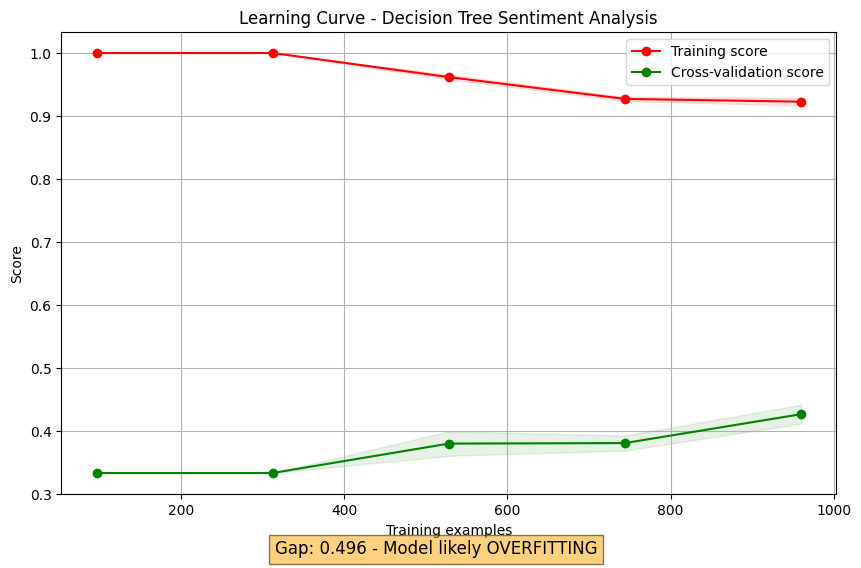


Generating complexity curves...


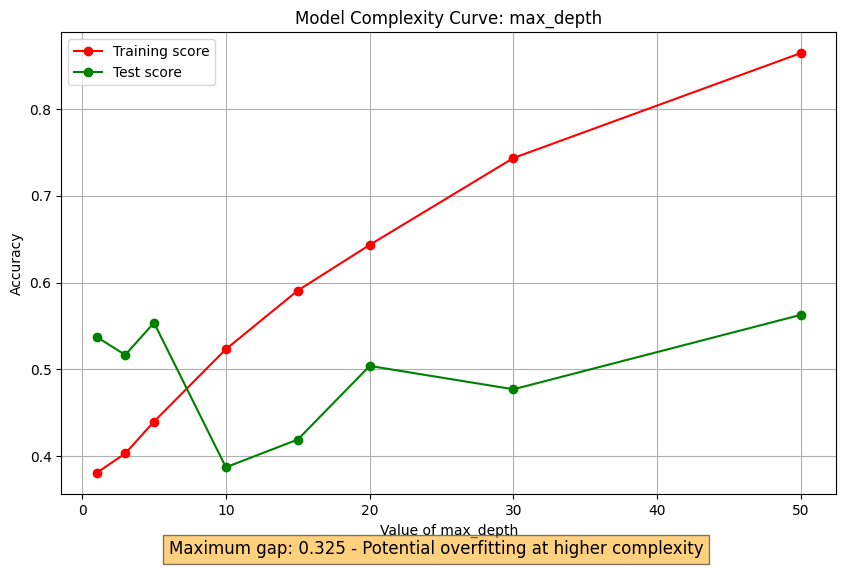

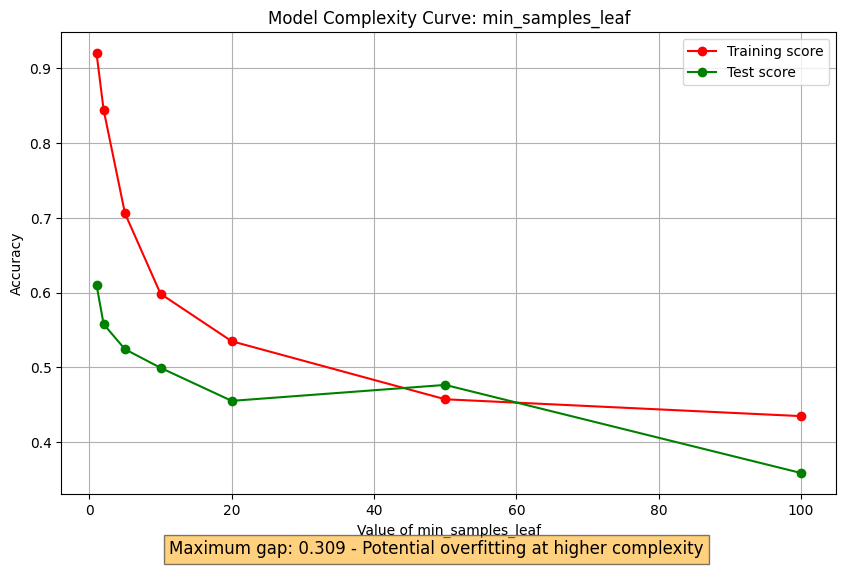


==== FINAL MODEL FIT DIAGNOSIS ====
CONCLUSION: Model is OVERFITTING
The model performs exceptionally well on training data but much worse on test data.
Recommendations:
1. Increase min_samples_leaf or decrease max_depth to reduce complexity
2. Consider pruning the decision tree
3. Collect more training data if possible


In [12]:
def load_data(train_filepath, test_filepath):
    train_data = pd.read_csv(train_filepath)
    test_data = pd.read_csv(test_filepath)
    return train_data['text'], train_data['label'], test_data['text'], test_data['label']

def preprocess_text(text, min_length):
    return ' '.join([word for word in text.split() if len(word) >= min_length])

def main():
    train_filepath = '/content/drive/My Drive/Re_SA/MLs/train_df_balanced.csv'
    test_filepath = '/content/drive/My Drive/Re_SA/MLs/test_df_imbalanced.csv'
    X_train, y_train, X_test, y_test = load_data(train_filepath, test_filepath)
    X_train = X_train.apply(preprocess_text, min_length=0)
    X_test = X_test.apply(preprocess_text, min_length=0)



    pipeline = Pipeline([
        ('vectorizer', TfidfVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ])
    param_grid = {
        'vectorizer__ngram_range': [(1, 1), (1, 2)],
        'vectorizer__max_features': [5000, 10000],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth': [None, 10, 30],
        'classifier__min_samples_split': [2, 10],
        'classifier__min_samples_leaf': [1, 4]
    }

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)

    print("Fitting model with grid search...")
    grid_search.fit(X_train, y_train)

    print("Best parameters found: ", grid_search.best_params_)

    cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
    print("Cross-validation scores: ", cv_scores)
    print("Mean cross-validation score: ", cv_scores.mean())

    y_pred = grid_search.predict(X_test)
    print(classification_report(y_test, y_pred, digits=3))

    output_filepath = '/content/drive/My Drive/Re_SA/MLs/DT_Bow_predictions_eva.csv'
    pd.DataFrame({'Text': X_test, 'Actual': y_test, 'Predicted': y_pred}).to_csv(output_filepath, index=False)
    print(f"Predictions saved to {output_filepath}")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    cm = confusion_matrix(y_test, y_pred, normalize="true")
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.3f', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Normalized Confusion Matrix')
    plt.show()

    # ---- OVERFITTING/UNDERFITTING ANALYSIS ----

    best_model = grid_search.best_estimator_
    print("\n==== EVALUATING MODEL FIT ====")
    train_score, test_score, gap = evaluate_model_fit(best_model, X_train, y_train, X_test, y_test)

    print("\nGenerating learning curve...")
    plot_learning_curve(best_model, X_train, y_train,
                       title="Learning Curve - Decision Tree Sentiment Analysis",
                       cv=5).show()

    print("\nGenerating complexity curves...")

    best_params = grid_search.best_params_
    base_pipeline = Pipeline([
        ('vectorizer', CountVectorizer(
            ngram_range=best_params['vectorizer__ngram_range'],
            max_features=best_params['vectorizer__max_features']
        )),
        ('classifier', DecisionTreeClassifier(
            criterion=best_params['classifier__criterion'],
            max_depth=best_params['classifier__max_depth'],
            min_samples_split=best_params['classifier__min_samples_split'],
            min_samples_leaf=best_params['classifier__min_samples_leaf']
        ))
    ])

    depth_range = [1, 3, 5, 10, 15, 20, 30, 50, None]
    train_depths, test_depths = plot_complexity_curve(
        X_train, y_train, X_test, y_test,
        'max_depth', depth_range, base_pipeline
    )

    leaf_range = [1, 2, 5, 10, 20, 50, 100]
    train_leaves, test_leaves = plot_complexity_curve(
        X_train, y_train, X_test, y_test,
        'min_samples_leaf', leaf_range, base_pipeline
    )


    print("\n==== FINAL MODEL FIT DIAGNOSIS ====")
    if gap > 0.1 and train_score > 0.9:
          print("CONCLUSION: Model is OVERFITTING")
          print("The model performs exceptionally well on training data but much worse on test data.")
          print("Recommendations:")
          print("1. Increase min_samples_leaf or decrease max_depth to reduce complexity")
          print("2. Consider pruning the decision tree")
          print("3. Collect more training data if possible")
    elif test_score < 0.7:
          print("CONCLUSION: Model is UNDERFITTING")
          print("The model performs poorly on both training and test data.")
          print("Recommendations:")
          print("1. Increase model complexity (deeper tree, lower min_samples)")
          print("2. Add more features or different feature representations")
          print("3. Consider using a more powerful model")
    else:
          print("CONCLUSION: Model has GOOD FIT")
          print(f"Training accuracy: {train_score:.3f}, Test accuracy: {test_score:.3f}, Gap: {gap:.3f}")
          print("The model generalizes well with acceptable performance.")


if __name__ == "__main__":
    main()

# Linear SVM

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found:  {'classifier__C': 0.1, 'feature_selection__k': 'all', 'feature_selection__score_func': <function chi2 at 0x7d2d6eaf5750>, 'vectorizer__max_features': 5000, 'vectorizer__ngram_range': (1, 1)}
Cross-validation scores:  [0.51666667 0.5125     0.5        0.55833333 0.5125    ]
Mean cross-validation score:  0.5200000000000001
              precision    recall  f1-score   support

           0      0.713     0.730     0.722       701
           1      0.447     0.865     0.590       274
           2      0.867     0.630     0.730       997

    accuracy                          0.698      1972
   macro avg      0.676     0.742     0.680      1972
weighted avg      0.754     0.698     0.707      1972

Predictions saved to /content/drive/My Drive/Re_SA/MLs/LSVM_TF_predictions.csv


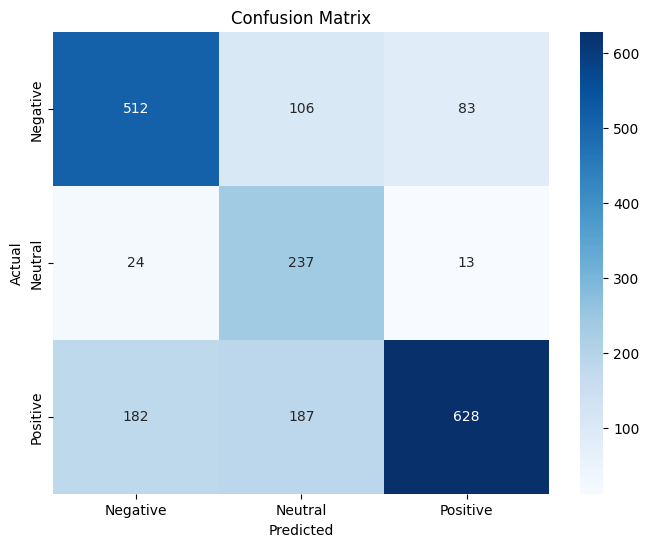

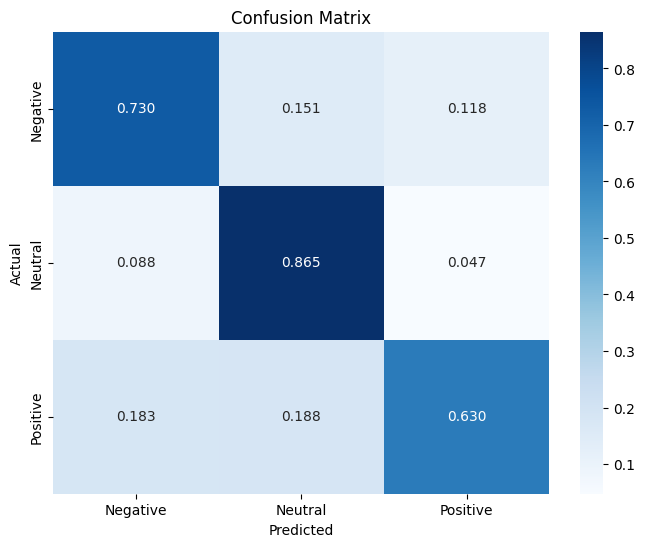

In [ ]:
def load_data(train_filepath, test_filepath):
    train_data = pd.read_csv(train_filepath)
    test_data = pd.read_csv(test_filepath)
    return train_data['text'], train_data['label'], test_data['text'], test_data['label']
def main():
    train_filepath = '/content/drive/My Drive/Re_SA/MLs/train_df_balanced.csv'
    test_filepath = '/content/drive/My Drive/Re_SA/MLs/test_df_imbalanced.csv'
    X_train, y_train, X_test, y_test = load_data(train_filepath, test_filepath)
    X_train = X_train.apply(preprocess_text, min_length=0)
    X_test = X_test.apply(preprocess_text, min_length=0)


    pipeline = Pipeline([
        ('vectorizer', TfidfVectorizer()),
        ('feature_selection', SelectKBest()),
        ('classifier', LinearSVC())
    ])

    param_grid = {
        'vectorizer__ngram_range': [(1, 1), (1, 2), (2, 2)],
        'vectorizer__max_features': [1000, 5000, 10000],
        'feature_selection__score_func': [chi2],
        'feature_selection__k': [500, 1000, 'all'],
        'classifier__C': [0.1, 1, 10]
    }

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)

    grid_search.fit(X_train, y_train)

    print("Best parameters found: ", grid_search.best_params_)

    cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
    print("Cross-validation scores: ", cv_scores)
    print("Mean cross-validation score: ", cv_scores.mean())

    y_pred = grid_search.predict(X_test)
    print(classification_report(y_test, y_pred, digits=3))

    output_filepath = '/content/drive/My Drive/Re_SA/MLs/LSVM_TF_predictions.csv'
    pd.DataFrame({'Text':X_test,'Actual': y_test, 'Predicted': y_pred}).to_csv(output_filepath, index=False)
    print(f"Predictions saved to {output_filepath}")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


    cm = confusion_matrix(y_test, y_pred, normalize="true")
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.3f', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


if __name__ == "__main__":
    main()



# Non-linear SVM

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
405 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/

Best parameters found:  {'classifier__C': 1, 'classifier__kernel': 'poly', 'feature_selection__k': 'all', 'feature_selection__score_func': <function chi2 at 0x7d2d6eaf5750>, 'vectorizer__max_features': 5000, 'vectorizer__ngram_range': (1, 2)}
Cross-validation scores:  [0.45416667 0.5375     0.53333333 0.575      0.53333333]
Mean cross-validation score:  0.5266666666666666
              precision    recall  f1-score   support

           0      0.697     0.792     0.741       701
           1      0.520     0.993     0.683       274
           2      0.894     0.586     0.708       997

    accuracy                          0.716      1972
   macro avg      0.704     0.790     0.711      1972
weighted avg      0.772     0.716     0.716      1972

Predictions saved to /content/drive/My Drive/Re_SA/MLs/NLSVM_TF_predictions.csv


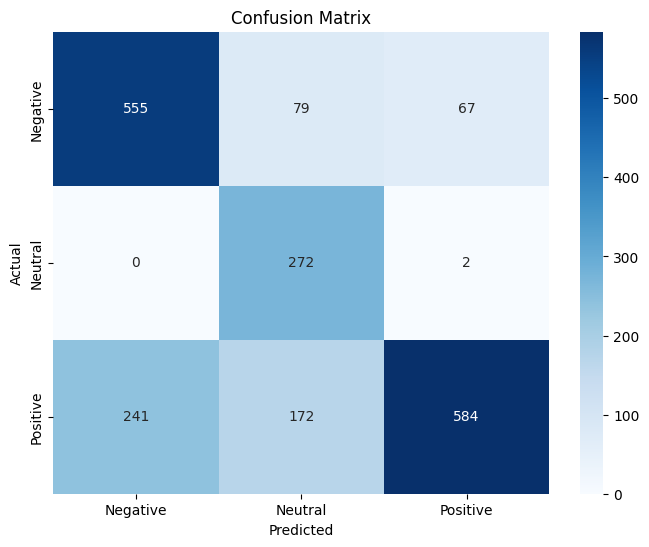

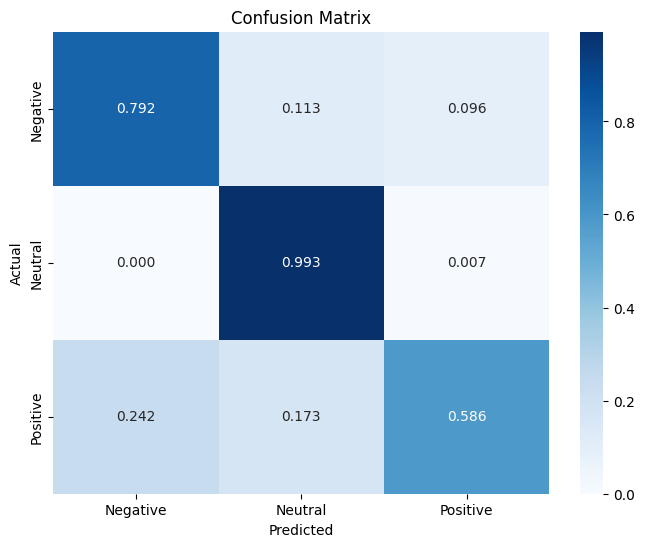

In [ ]:
def load_data(train_filepath, test_filepath):
    train_data = pd.read_csv(train_filepath)
    test_data = pd.read_csv(test_filepath)
    return train_data['text'], train_data['label'], test_data['text'], test_data['label']

def preprocess_text(text, min_length):
    return ' '.join([word for word in text.split() if len(word) >= min_length])

def main():
    train_filepath = '/content/drive/My Drive/Re_SA/MLs/train_df_balanced.csv'
    test_filepath = '/content/drive/My Drive/Re_SA/MLs/test_df_imbalanced.csv'
    X_train, y_train, X_test, y_test = load_data(train_filepath, test_filepath)
    X_train = X_train.apply(preprocess_text, min_length=0)
    X_test = X_test.apply(preprocess_text, min_length=0)


    pipeline = Pipeline([
        ('vectorizer', TfidfVectorizer()),
        ('feature_selection', SelectKBest()),
        ('classifier', SVC())
    ])

    param_grid = {
        'vectorizer__ngram_range': [(1, 1), (1, 2), (2, 2)],
        'vectorizer__max_features': [1000, 5000, 10000],
        'feature_selection__score_func': [chi2],
        'feature_selection__k': [500, 1000, 'all'],
        'classifier__kernel': ['poly', 'rbf','sigmoid','precomputed'],
        'classifier__C': [0.1, 1, 10]
    }

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)

    grid_search.fit(X_train, y_train)

    print("Best parameters found: ", grid_search.best_params_)

    cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
    print("Cross-validation scores: ", cv_scores)
    print("Mean cross-validation score: ", cv_scores.mean())

    y_pred = grid_search.predict(X_test)
    print(classification_report(y_test, y_pred, digits=3))


    output_filepath = '/content/drive/My Drive/Re_SA/MLs/NLSVM_TF_predictions.csv'
    pd.DataFrame({'Text':X_test,'Actual': y_test, 'Predicted': y_pred}).to_csv(output_filepath, index=False)
    print(f"Predictions saved to {output_filepath}")


    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()



    cm = confusion_matrix(y_test, y_pred, normalize="true")
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.3f', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


if __name__ == "__main__":
    main()